Copyright (c) 2021 [Georgina Flesia](georgina.flesia@unc.edu.ar)

<center>
<img src="../images/ods_stickers.jpg" />
    
## Introducción al Machine Learning

Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

###  Vamos a estudiar Clasificación Bayesiana  Cuadrática con parámetros estimados por máxima verosimilitud.

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns
from sklearn import decomposition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D



Cargamos Iris del paquete seaborn con tres clases 

Text(0.5, 1.0, 'Scatter plot Iris')

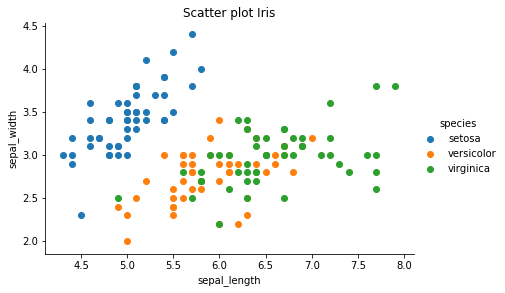

In [5]:
iris = sns.load_dataset("iris")

sns.FacetGrid(iris, hue="species", height=4,aspect=1.5) .map(plt.scatter,"sepal_length", "sepal_width" ).add_legend()

plt.title('Scatter plot Iris')
#plt.savefig('images/01_pca_qda.png', dpi=300)

Extraemos las variables sepal length y sepal width y realizamos el cuadratic Discriminant Analysis

In [6]:
X_data2 = iris.iloc[:, [0,1]].values
y_data2 = iris.iloc[:,4].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_data2,y_data2)
    

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True,
                              tol=0.0001)

Ahor mostramos la región de decisión resultante

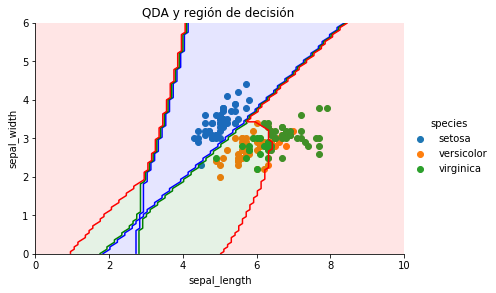

In [8]:


# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(0, 10, N)
Y = np.linspace(0, 6, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", height=4,aspect=1.5 ) .map(plt.scatter, "sepal_length", "sepal_width",).add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [qda.predict( np.array([[xx,yy]])) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('sepal_length')
my_ax.set_ylabel('sepal_width')
my_ax.set_title('QDA y región de decisión ')


#plt.savefig('images/02_pca_qda.png', dpi=300)
plt.show()

Repetimos el análisis sobre componentes principales 

In [9]:
pca = decomposition.PCA(n_components=2)
# extract sepal length and sepal width
X_data = iris.iloc[:, :4].values
#print(X_data)
pca.fit(X_data)
data = pca.transform(X_data)
vr = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


In [10]:

df = pd.DataFrame(data, columns=["PC1", "PC2"])
df['species'] = iris.iloc[:, 4]
y_labels = iris.iloc[:,4].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()


Text(31.79592013888889, 0.5, 'PC2 (5.3%)')

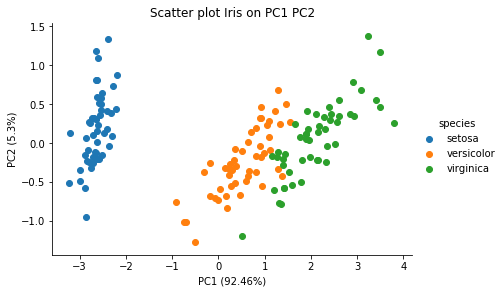

In [13]:

g=sns.FacetGrid(df, hue="species", height=4,aspect=1.5) .map(plt.scatter,"PC1", "PC2", ).add_legend()
plt.title('Scatter plot Iris on PC1 PC2')
g.ax.set_xlabel('PC1 (92.46%)')
g.ax.set_ylabel('PC2 (5.3%)')
#plt.savefig('images/03_pca_qda.png', dpi=300)

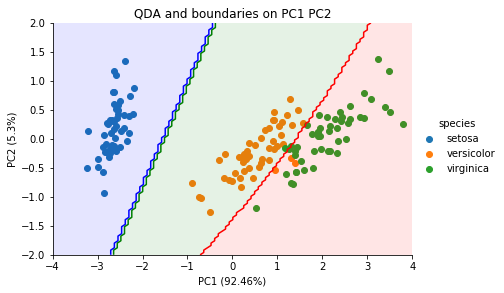

In [17]:


#lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
#lda.fit(data,y_labels)
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(data,y_labels)

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X3 = np.linspace(-4, 4, N)
Y3 = np.linspace(-2, 2, N)
X3, Y3 = np.meshgrid(X3, Y3)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(df, hue="species", height=4,aspect=1.5) .map(plt.scatter, "PC1", "PC2",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz3 = np.array(  [qda.predict( np.array([[xx3,yy3]])) 
                     for xx3, yy3 in zip(np.ravel(X3), np.ravel(Y3)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z3 = zz3.reshape(X3.shape)


#Plot the filled and boundary contours
my_ax.contourf( X3, Y3, Z3, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X3, Y3, Z3, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('PC1 (92.46%)')
my_ax.set_ylabel('PC2 (5.3%)')
my_ax.set_title('QDA and boundaries on PC1 PC2')


#plt.savefig('images/04_pca_qda.png', dpi=300)
plt.show()

Como hay tres clases, puedo proyectar en las dos primeras componentes discriminantes y alli realizar el analisis discriminante cuadrático. 

In [18]:
# original data
X_data3 = iris.iloc[:, :4].values
y_data3 = iris.iloc[:,4].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

lda = LinearDiscriminantAnalysis(n_components=2,solver="svd", store_covariance=True)
X_r1 = lda.fit(X_data3,y_data3).transform(X_data3)

df1 = pd.DataFrame(X_r1, columns=["LD1","LD2"])

df1['species'] = iris.iloc[:, 4]


datas=df1.iloc[:, :2].values


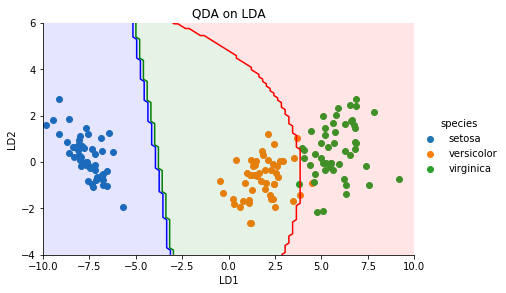

In [19]:
qda2 = QuadraticDiscriminantAnalysis(store_covariance=True)

qda2.fit(datas,y_data3)


# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-10, 10, N)
Y = np.linspace(-4, 6, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()

#Computing the predicted class function for each value on the grid
zz = np.array(  [qda2.predict( np.array([[xx,yy]])) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(df1, hue="species",height=4,aspect=1.5) .map(plt.scatter, "LD1", "LD2",).add_legend()
my_ax = g.ax



#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('LD1')
my_ax.set_ylabel('LD2')
my_ax.set_title('QDA on LDA')



#plt.savefig('images/02_qda_lda.png', dpi=300)
plt.show()